## Parsing data from keyboard log file

1. Import log_parser module
2. Call parse_keyboard_log(filepath), filepath = path to log file
3. Store result in a variable (type: Pandas DataFrame)

#### Retrieving a certain time interval from parsed data

1. Call get_segment(parsedData, index, seg_length) <br/>
    parsedData = data returned from parse_keyboard_log() <br/>
    index = which data segment to retrieve (of seg_length) <br/>
    seg_length = length of segment (time interval in seconds, default 60s) <br/>
2. Store result in a variable (type: Pandas DataFrame)

In [18]:
import log_parser

keyboard_data = log_parser.parse_keyboard_log("keyboard_actions_jon_spy_nov8.log")
#print(keyboard_data)

# Get 5th 30s segment from data
keyboard_data_segment = log_parser.get_segment(keyboard_data, index=2, seg_length=10)
print(keyboard_data_segment)

       time  key    action class
24  10.2886  'a'   pressed   NaN
25  10.3386  'w'  released   NaN
26  10.6385  'a'  released   NaN
27  10.6586  'w'   pressed   NaN
28  10.9488  'd'   pressed   NaN
..      ...  ...       ...   ...
85  18.4384  'a'   pressed   NaN
86  18.8788  'a'  released   NaN
87  19.3184  'a'   pressed   NaN
88  19.5289  'a'  released   NaN
89  19.8684  'd'   pressed   NaN

[66 rows x 4 columns]


## Parsing data from mouse log file

1. Import log_parser module
2. Call parse_mouse_log(filepath), filepath = path to log file
3. Store result in a variable (type: Pandas DataFrame)

#### Retrieving a certain time interval from parsed data

1. Call get_segment(parsedData, index, seg_length) <br/>
    parsedData = data returned from parse_keyboard_log() <br/>
    index = which data segment to retrieve (of seg_length) <br/>
    seg_length = length of segment (time interval in seconds, default 60s) <br/>
2. Store result in a variable (type: Pandas DataFrame)

In [2]:
import log_parser

mouse_data = log_parser.parse_mouse_log("mouse_actions.log")
print(mouse_data)

# Get 5th 30s segment from data
mouse_data_segment = log_parser.get_segment(mouse_data, index=5, seg_length=30)
print(mouse_data_segment)

             time     x    y button   action  class
0          1.3364   943  515   None     None    NaN
1          1.4306   947  514   None     None    NaN
2          1.6931   948  514   None     None    NaN
3          1.6951   949  514   None     None    NaN
4          1.6962   950  514   None     None    NaN
...           ...   ...  ...    ...      ...    ...
354768  1303.4239  1170  515   None     None    NaN
354769  1303.4299  1171  515   None     None    NaN
354770  1303.4409  1172  515   None     None    NaN
354771  1303.4418  1172  514   None     None    NaN
354772  1304.4521  1172  514   left  pressed    NaN

[354773 rows x 6 columns]
           time    x    y button action  class
40265  120.0009  638  387   None   None    NaN
40266  120.0018  637  387   None   None    NaN
40267  120.0039  637  387   None   None    NaN
40268  120.0049  636  387   None   None    NaN
40269  120.0079  636  388   None   None    NaN
...         ...  ...  ...    ...    ...    ...
50038  149.9961  261

### Example usage of MouseHeatmap

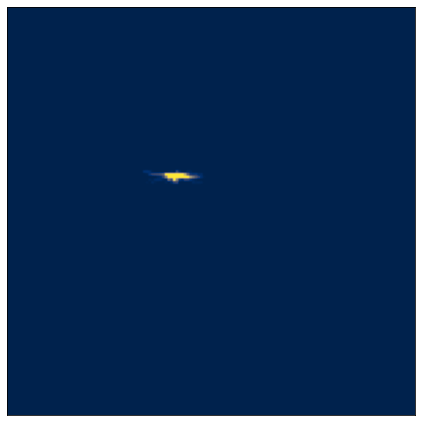

In [12]:
# Import log parser and mouse heatmap modules
import log_parser
import mouse_heatmap

# Generate the dataframe from log file
mouse_data = log_parser.parse_mouse_log("mouse_actions.log")

# Retrieve the 4th minute from the dataframe
# MouseHeatmap module has a function for this
mouse_data_segment = log_parser.get_segment(mouse_data, 4, seg_length=60)

# Use that segment to create the heatmap object
heatmap = mouse_heatmap.MouseHeatmap(mouse_data_segment)

# Show the segment as a 150x150 heatmap
heatmap.show_heatmap((150, 150))

## Example usage of keyboard_heatmap

In [1]:
# Import keyboard_heatmap module
import keyboard_heatmap
import log_parser
import numpy as np
import pandas as pd

# Getting the data from  parsed input keyboard log file
keyboard_data_Jon = log_parser.parse_keyboard_log("keyboard_actions_jon_spy_nov8.log")
keyboard_data_segment_Jon = log_parser.get_segment(keyboard_data_Jon, index=1, seg_length=500)
heatmap_Jon = keyboard_heatmap.keyboardHeatmap(keyboard_data_segment_Jon)

keyboard_data_Zirui = log_parser.parse_keyboard_log("Zirui_Keyboard.log")
keyboard_data_segment_Zirui = log_parser.get_segment(keyboard_data_Zirui, index=1, seg_length=500)
heatmap_Zirui = keyboard_heatmap.keyboardHeatmap(keyboard_data_segment_Zirui)
# Need to calculate max vlaue for color bar before showing heatmap
heatmaps = []
heatmaps.append(heatmap_Jon)
heatmaps.append(heatmap_Zirui)
for item in heatmaps:
    maxF = float(np.max(item.keyboard_df.freq))
    maxD = float(np.max(item.keyboard_df.avg_duration))
    if maxF > keyboard_heatmap.keyboardHeatmap.maxFreq:
        keyboard_heatmap.keyboardHeatmap.maxFreq = maxF
    if maxD > keyboard_heatmap.keyboardHeatmap.maxDura:
        keyboard_heatmap.keyboardHeatmap.maxDura = maxD
keyboard_heatmap.keyboardHeatmap.show_heatmap(heatmap_Jon)
keyboard_heatmap.keyboardHeatmap.show_heatmap(heatmap_Zirui)

FileNotFoundError: [Errno 2] No such file or directory: 'keyboard_actions_jon_spy_nov8.log'